**NLP**: Product category prediction using product description
                                      

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#library for dataframe and its operations
import numpy as np
import pandas as pd

In [3]:
#data reading just upload data to session storage and use it
df=pd.read_csv("/content/drive/MyDrive/flipkart_NLP_classification/flipkart_com-ecommerce_sample - flipkart_com-ecommerce_sample.csv")
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",0,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",0,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",0,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",0,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",0,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [4]:
print(df.columns)

Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')


In [5]:
#drop the unnecesarry columns
df.drop(['uniq_id', 'crawl_timestamp', 'product_url','pid', 'retail_price', 'discounted_price','image', 'is_FK_Advantage_product','product_rating',
       'overall_rating', ], axis=1,inplace=True)

In [6]:
df.columns

Index(['product_name', 'product_category_tree', 'description', 'brand',
       'product_specifications'],
      dtype='object')

In [7]:
#check for NULL values
df[df['description'].isnull()==True]

,product_name,product_category_tree,description,brand,product_specifications
553,Ozel Studio Casual Sleeveless Printed Women's Top,"[""Clothing >> Women's Clothing >> Western Wear...",NaN,NaN,"{""product_specification""=>[{""key""=>""Ideal For""..."
17299,Amore Abstract Cushions Cover,"[""Home Furnishing >> Cushions, Pillows & Cover...",NaN,Amore,"{""product_specification""=>[{""key""=>""Brand"", ""v..."


In [8]:
#we can drop these two rows so that null values will be avoided and also it will not create much diffrence in our model
df.drop(labels=[553,17299],axis=0,inplace =True)

In [9]:
#text cleaning libraries
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Text preprocessing**:In this block we are preprocessing text
1. First we imported porterstemmer module which is used for stemming text data.
2. I have done preprocessing mainly on 2 columns 'product_category_tree' and 'description'.
3. I have ignored the deleted rows(553 and 17299)
4. first in 'product_category_tree' I removed all the elements except alphabets and spaces then i convert it all in lowercase elements and then split it and join using space and appended in the list corpus.
5. Secondly in 'description' column I removed all the elements except alphabets and spaces then i convert it all in lowercase elements after that I have deleted all the stopwords present in the description and done the stemming using porterstemmer module then split it and join it using space and appended in the list crpus
6. This is the basic operation for any NLP project
7. I have used set during stemming to improve runtime.

In [11]:
crpus=[]
ps=PorterStemmer()
corpus=[]
for i in range(0,20000):
 if i!=553 and i!=17299:#because we have removed these two rows
  review=re.sub('[^a-zA-Z]',' ',df['product_category_tree'][i])
  review=review.lower()
  review=review.split()
#we use set here with stopwords to reduce execution time
  review=' '.join(review)
  corpus.append(review)
#description preprocessing
  review=re.sub('[^a-zA-Z]',' ',df['description'][i])
  
  review=review.lower()
  review=review.split()
  review=[ps.stem(word )for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  crpus.append(review)

In [13]:
#declaring and showing dataframe containing only these two coumns 
df=pd.DataFrame({"product_category":corpus,"description":crpus})
df.head()

,product_category,description
0,clothing women s clothing lingerie sleep swimw...,key featur alisha solid women cycl short cotto...
1,furniture living room furniture sofa beds futo...,fabhomedecor fabric doubl sofa bed finish colo...
2,footwear women s footwear ballerinas aw bellies,key featur aw belli sandal wedg heel casual aw...
3,clothing women s clothing lingerie sleep swimw...,key featur alisha solid women cycl short cotto...
4,pet supplies grooming skin coat care shampoo s...,specif sicon purpos arnica dog shampoo ml gene...


In [19]:
#first word is depicting the product category so we can drop other words in the product category or we can go for sub-category as required
df['product_category'] = df['product_category'].apply(lambda x : x.split()[0][0:].strip())

In [20]:
df.head()

,product_category,description
0,clothing,key featur alisha solid women cycl short cotto...
1,furniture,fabhomedecor fabric doubl sofa bed finish colo...
2,footwear,key featur aw belli sandal wedg heel casual aw...
3,clothing,key featur alisha solid women cycl short cotto...
4,pet,specif sicon purpos arnica dog shampoo ml gene...


**Data Visualization**

In [22]:
#library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 2160x5040 with 0 Axes>

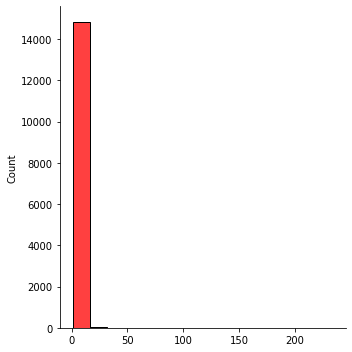

In [23]:
#this is distplot of df.groupby(['description']).size(), i used it as it is a combination of rugplot and kdeplot
plt.figure(figsize=(30,70))
sns.displot( df.groupby(['description']).size(),kde=False,color='r')
plt.show()


<Figure size 2160x5040 with 0 Axes>

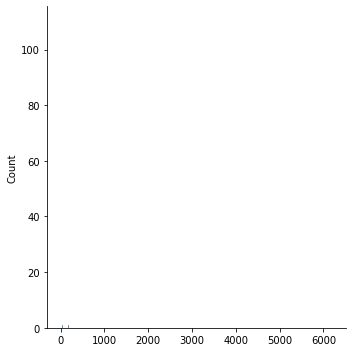

In [24]:
#this is distplot of df.groupby([''product_category'']).size(), i used it as it is a combination of rugplot and kdeplot
plt.figure(figsize=(30,70))
sns.displot( df.groupby(['product_category']).size(),kde=False)
plt.show()


In [26]:
#data preprocessing libraries  
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [27]:
X=df['description']
y=df['product_category']
cv= CountVectorizer()
X=cv.fit_transform(X)
le=LabelEncoder()
le=le.fit(y)
y=le.transform(y)

In [29]:
#library for importing models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [32]:
#libraries to determine model validity
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

**Multinomial Naive bayes Classifier**

In [36]:
mnb=MultinomialNB()
#model fitting
mnb.fit(X_train,y_train)
#prediction
pred_y=mnb.predict(X_test)

In [37]:
#check accuracy and underfitting using classification report and accuracy score
r=accuracy_score(y_test,pre)
print(r)
print(classification_report(y_test,pred_y))

0.9144
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.92      0.99      0.95       239
          18       0.81      0.61      0.70       116
          19       0.84      0.62      0.72        87
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.86      0.96      0.91       184
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       1.00      0.18      0.31        22
          35       0.00      0.00      0.00         1
          37       0.96      0.99      0.97      1538
          38       0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
print("accuracy on test set: ", accuracy_score(y_test,pred_y))
print("accuracy on training set: ", accuracy_score(y_train,mnb.predict(X_train)))
#here accuracy in both the set is comparable so no overfitting condition

accuracy on test set:  0.9144
accuracy on training set:  0.934191225496733


**Logistic Regression**

In [41]:
lr=LogisticRegression()
#Model fitting
lr.fit(X_train,y_train)
#model prediction
pred_y=lr.predict(X_test)
#Model performance calcutation and check whether underfitting is there or not.
r=accuracy_score(y_test,pred_y)
cm=confusion_matrix(y_test,pred_y)
print(r)

print(classification_report(y_test,pred_y))

0.9568
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       1.00      0.50      0.67         2
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.98      0.98      0.98       239
          18       0.91      0.84      0.88       116
          19       0.94      0.98      0.96        87
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.95      0.95      0.95       184
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.91      0.95      0.93        22
          35       0.00      0.00      0.00         1
          37       0.97      0.99      0.98      1538
          38       0

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in

**checking Accuracy**
* The Block below is used to calculate accuracy and to check underfitting
* the Block below this block is used to check overfitting  by observing difference in model accuracies when prediction is done in test set and training set(if difference is high then there is overfitting and if diffrence is low there is no overfitting).

In [42]:
#Model gives accuracy of 96 percent which is better than  multinomail naive bayes
#check overfitting for multinoial Logistic regression using diffrence in accuracy when model predicts on X_test and X_train
print("accuracy on test set: ", accuracy_score(y_test,pre))
print("accuracy on training set: ", accuracy_score(y_train,lr.predict(X_train)))
#here difference in accuracy is very less hence model is NOT overfitting 


accuracy on test set:  0.9144
accuracy on training set:  0.9970662755034004


## RandomForest algorithms

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
#model prediction
pred_y=rf.predict(X_test)
#Model performance calcutation and check whether underfitting is there or not.
r=accuracy_score(y_test,pred_y)
cm=confusion_matrix(y_test,pred_y)
print(r)

print(classification_report(y_test,pred_y))

0.341
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00       239
          18       0.00      0.00      0.00       116
          19       0.00      0.00      0.00        87
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00       184
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         1
          30       0.00      0.00      0.00        22
          35       0.00      0.00      0.00         1
          37       0.32      1.00      0.48      1538
          38       0.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


it is giving very less accuracy so we should go with other model